In [591]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as m

from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit, \
                                    cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

%matplotlib inline

In [592]:
import warnings
warnings.filterwarnings('ignore')

In [593]:
train_C2H6 = pd.read_csv('train_data_C2H6.csv', header = 0, sep = ',')
train_C3H8 = pd.read_csv('train_data_C3H8.csv', header = 0, sep = ',')
train_iC4H10 = pd.read_csv('train_data_iC4H10.csv', header = 0, sep = ',')
train_nC4H10 = pd.read_csv('train_data_nC4H10.csv', header = 0, sep = ',')

In [594]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [595]:
train_C2H6

,B_rate,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,Cx_A_C2H6,Cx_A_C3H8,Cx_A_iC4H10,Cx_A_nC4H10,Re_A,Cx_A_C2H6**2,G_B_C2H6
0,74.008719,0.086957,3.356153,29.159694,12.647984,17.548094,3.243298,3.218076,3.666530,-0.489581,-2.242475,0.181389,0.840950,413249.045710,0.239689,3.601206
1,74.029338,0.086015,3.349774,29.187816,12.663290,17.551191,3.235645,3.213223,3.661857,-0.246485,-1.218358,0.068624,0.481135,413185.999580,0.060755,3.601483
2,74.041296,0.085309,3.348326,29.191211,12.680529,17.559263,3.231373,3.210637,3.663621,-0.170814,-0.395380,0.087099,0.311532,413153.130907,0.029178,3.607580
3,74.060868,0.085687,3.375958,29.246264,12.687315,17.533756,3.216747,3.193067,3.646075,-0.233986,-0.463693,0.114547,0.348560,413782.713116,0.054749,3.608927
4,74.079009,0.086483,3.417163,29.393718,12.689038,17.478734,3.188276,3.160324,3.598479,-0.301800,-0.794489,0.143525,0.452051,414960.599962,0.091083,3.611030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,72.121189,0.218365,3.572406,25.245525,11.661197,17.125750,4.133846,3.641633,4.373171,0.065118,1.116313,0.302852,0.797466,413983.930391,0.004240,3.613900
5735,72.237662,0.215943,3.565468,25.309821,11.678729,17.142614,4.141024,3.646513,4.399564,0.061315,1.155294,0.286835,0.778843,414147.971365,0.003760,3.619171
5736,72.362225,0.215254,3.567413,25.362570,11.692550,17.154685,4.146153,3.654012,4.426818,0.056553,1.181358,0.273169,0.754738,414636.369811,0.003198,3.627698
5737,72.481486,0.214325,3.570442,25.424037,11.707783,17.166859,4.148601,3.657421,4.447953,0.056916,1.218438,0.269037,0.729642,415123.962871,0.003239,3.638930


In [596]:
col_C2H6 = [i for i in train_C2H6.drop('G_B_C2H6',axis=1).columns]

In [597]:
X_C2H6 = train_C2H6.drop('G_B_C2H6',1)
y_C2H6 = train_C2H6['G_B_C2H6']

scaler_C2H6 = StandardScaler()
scaler_C2H6.fit(X_C2H6, y_C2H6)
X_scaled_C2H6 = scaler_C2H6.transform(X_C2H6)

In [598]:
train_C3H8

,B_rate,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,Re_A,Cx_A_C3H8,Cx_A_nC4H10,Cx_A_iC4H10,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,G_B_C3H8
0,74.008719,0.086957,3.356153,29.159694,12.647984,17.548094,3.243298,3.218076,3.666530,413249.045710,-2.242475,0.840950,0.181389,5.028694,0.032902,0.707197,28.709568
1,74.029338,0.086015,3.349774,29.187816,12.663290,17.551191,3.235645,3.213223,3.661857,413185.999580,-1.218358,0.481135,0.068624,1.484397,0.004709,0.231491,28.712805
2,74.041296,0.085309,3.348326,29.191211,12.680529,17.559263,3.231373,3.210637,3.663621,413153.130907,-0.395380,0.311532,0.087099,0.156325,0.007586,0.097052,28.757616
3,74.060868,0.085687,3.375958,29.246264,12.687315,17.533756,3.216747,3.193067,3.646075,413782.713116,-0.463693,0.348560,0.114547,0.215011,0.013121,0.121494,28.770116
4,74.079009,0.086483,3.417163,29.393718,12.689038,17.478734,3.188276,3.160324,3.598479,414960.599962,-0.794489,0.452051,0.143525,0.631212,0.020599,0.204350,28.788421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,72.121189,0.218365,3.572406,25.245525,11.661197,17.125750,4.133846,3.641633,4.373171,413983.930391,1.116313,0.797466,0.302852,1.246155,0.091720,0.635951,25.788062
5735,72.237662,0.215943,3.565468,25.309821,11.678729,17.142614,4.141024,3.646513,4.399564,414147.971365,1.155294,0.778843,0.286835,1.334705,0.082274,0.606597,25.830453
5736,72.362225,0.215254,3.567413,25.362570,11.692550,17.154685,4.146153,3.654012,4.426818,414636.369811,1.181358,0.754738,0.273169,1.395607,0.074621,0.569630,25.881397
5737,72.481486,0.214325,3.570442,25.424037,11.707783,17.166859,4.148601,3.657421,4.447953,415123.962871,1.218438,0.729642,0.269037,1.484590,0.072381,0.532378,25.950659


In [599]:
col_C3H8 = [i for i in train_C3H8.drop('G_B_C3H8',axis=1).columns]

In [600]:
X_C3H8 = train_C3H8.drop('G_B_C3H8',1)
y_C3H8 = train_C3H8['G_B_C3H8']

scaler_C3H8 = StandardScaler()
scaler_C3H8.fit(X_C3H8, y_C3H8)
X_scaled_C3H8 = scaler_C3H8.transform(X_C3H8)

In [601]:
train_iC4H10

,B_rate,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,Re_A,Cx_A_C3H8,Cx_A_nC4H10,Cx_A_iC4H10,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,G_B_iC4H10
0,74.008719,0.086957,3.356153,29.159694,12.647984,17.548094,3.243298,3.218076,3.666530,413249.045710,-2.242475,0.840950,0.181389,5.028694,0.032902,0.707197,12.538392
1,74.029338,0.086015,3.349774,29.187816,12.663290,17.551191,3.235645,3.213223,3.661857,413185.999580,-1.218358,0.481135,0.068624,1.484397,0.004709,0.231491,12.540661
2,74.041296,0.085309,3.348326,29.191211,12.680529,17.559263,3.231373,3.210637,3.663621,413153.130907,-0.395380,0.311532,0.087099,0.156325,0.007586,0.097052,12.544962
3,74.060868,0.085687,3.375958,29.246264,12.687315,17.533756,3.216747,3.193067,3.646075,413782.713116,-0.463693,0.348560,0.114547,0.215011,0.013121,0.121494,12.548059
4,74.079009,0.086483,3.417163,29.393718,12.689038,17.478734,3.188276,3.160324,3.598479,414960.599962,-0.794489,0.452051,0.143525,0.631212,0.020599,0.204350,12.549261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,72.121189,0.218365,3.572406,25.245525,11.661197,17.125750,4.133846,3.641633,4.373171,413983.930391,1.116313,0.797466,0.302852,1.246155,0.091720,0.635951,11.537228
5735,72.237662,0.215943,3.565468,25.309821,11.678729,17.142614,4.141024,3.646513,4.399564,414147.971365,1.155294,0.778843,0.286835,1.334705,0.082274,0.606597,11.561665
5736,72.362225,0.215254,3.567413,25.362570,11.692550,17.154685,4.146153,3.654012,4.426818,414636.369811,1.181358,0.754738,0.273169,1.395607,0.074621,0.569630,11.587488
5737,72.481486,0.214325,3.570442,25.424037,11.707783,17.166859,4.148601,3.657421,4.447953,415123.962871,1.218438,0.729642,0.269037,1.484590,0.072381,0.532378,11.616500


In [602]:
col_iC4H10 = [i for i in train_iC4H10.drop('G_B_iC4H10',axis=1).columns]

In [603]:
X_iC4H10 = train_iC4H10.drop('G_B_iC4H10',1)
y_iC4H10 = train_iC4H10['G_B_iC4H10']

scaler_iC4H10 = StandardScaler()
scaler_iC4H10.fit(X_iC4H10, y_iC4H10)
X_scaled_iC4H10 = scaler_iC4H10.transform(X_iC4H10)

In [604]:
train_nC4H10

,B_rate,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,Re_A,Cx_A_C3H8,Cx_A_iC4H10,Cx_A_nC4H10,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,G_B_nC4H10
0,74.008719,0.086957,3.356153,29.159694,12.647984,17.548094,3.243298,3.218076,3.666530,413249.045710,-2.242475,0.181389,0.840950,5.028694,0.032902,0.707197,17.617879
1,74.029338,0.086015,3.349774,29.187816,12.663290,17.551191,3.235645,3.213223,3.661857,413185.999580,-1.218358,0.068624,0.481135,1.484397,0.004709,0.231491,17.630216
2,74.041296,0.085309,3.348326,29.191211,12.680529,17.559263,3.231373,3.210637,3.663621,413153.130907,-0.395380,0.087099,0.311532,0.156325,0.007586,0.097052,17.629851
3,74.060868,0.085687,3.375958,29.246264,12.687315,17.533756,3.216747,3.193067,3.646075,413782.713116,-0.463693,0.114547,0.348560,0.215011,0.013121,0.121494,17.637232
4,74.079009,0.086483,3.417163,29.393718,12.689038,17.478734,3.188276,3.160324,3.598479,414960.599962,-0.794489,0.143525,0.452051,0.631212,0.020599,0.204350,17.637436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,72.121189,0.218365,3.572406,25.245525,11.661197,17.125750,4.133846,3.641633,4.373171,413983.930391,1.116313,0.302852,0.797466,1.246155,0.091720,0.635951,17.644192
5735,72.237662,0.215943,3.565468,25.309821,11.678729,17.142614,4.141024,3.646513,4.399564,414147.971365,1.155294,0.286835,0.778843,1.334705,0.082274,0.606597,17.685043
5736,72.362225,0.215254,3.567413,25.362570,11.692550,17.154685,4.146153,3.654012,4.426818,414636.369811,1.181358,0.273169,0.754738,1.395607,0.074621,0.569630,17.726825
5737,72.481486,0.214325,3.570442,25.424037,11.707783,17.166859,4.148601,3.657421,4.447953,415123.962871,1.218438,0.269037,0.729642,1.484590,0.072381,0.532378,17.763570


In [605]:
col_nC4H10 = [i for i in train_nC4H10.drop('G_B_nC4H10', axis=1).columns]

In [606]:
X_nC4H10 = train_nC4H10.drop('G_B_nC4H10',1)
y_nC4H10 = train_nC4H10['G_B_nC4H10']

scaler_nC4H10 = StandardScaler()
scaler_nC4H10.fit(X_nC4H10, y_nC4H10)
X_scaled_nC4H10 = scaler_nC4H10.transform(X_nC4H10)

## Кросс валидация

Обучение / тест

In [607]:
X_train_C2H6, X_test_C2H6, y_train_C2H6, y_test_C2H6 = train_test_split(
    X_scaled_C2H6, y_C2H6, test_size=0.2, shuffle=False, random_state=0)

In [608]:
X_train_C3H8, X_test_C3H8, y_train_C3H8, y_test_C3H8 = train_test_split(
    X_scaled_C3H8, y_C3H8, test_size=0.2, shuffle=False, random_state=0)

In [609]:
X_train_iC4H10, X_test_iC4H10, y_train_iC4H10, y_test_iC4H10 = train_test_split(
    X_scaled_iC4H10, y_iC4H10, test_size=0.2, shuffle=False, random_state=0)

In [610]:
X_train_nC4H10, X_test_nC4H10, y_train_nC4H10, y_test_nC4H10 = train_test_split(
    X_scaled_nC4H10, y_nC4H10, test_size=0.2, shuffle=False, random_state=0)

Стратегии кросс-валидации

In [611]:
cv_strategy_KFold = KFold(n_splits=5, random_state=0, shuffle=False)
cv_strategy_TMS = TimeSeriesSplit(n_splits=5)

Загружаем метрику качества

In [612]:
scorer = metrics.make_scorer(metrics.mean_absolute_error)
scorerCV = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=False)

# linear_regressor

### C2H6

In [613]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = linear_regressor.predict(X_test_C2H6)

In [614]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.436454596876902

In [615]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.45375068451927997, max:1.012785882586856, min:0.1504468134346211, std:0.29711584994874224


In [616]:
lr_scoring

array([0.28808998, 1.01278588, 0.35687078, 0.15044681, 0.46055997])

In [617]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.4478556323772381, max:0.6836790125133109, min:0.22618242246899903, std:0.16794925576195274


In [618]:
lr_scoring

array([0.52128821, 0.68367901, 0.28775568, 0.22618242, 0.52037284])

### C3H8

In [619]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = linear_regressor.predict(X_test_C3H8)

In [620]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.9209912217491845

In [621]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:1.4460473363786535, max:4.1249987807082995, min:0.4140707932354826, std:1.3619512911128584


In [622]:
lr_scoring

array([0.84846758, 4.12499878, 1.17143327, 0.41407079, 0.67126626])

In [623]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:3.62141067378842, max:13.9784299358864, min:0.5053570156498741, std:5.195544956016033


In [624]:
lr_scoring

array([13.97842994,  1.56327467,  0.62749531,  1.43249644,  0.50535702])

### iC4H10

In [625]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = linear_regressor.predict(X_test_iC4H10)

In [626]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

1.0579130659972311

In [627]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.5392660454358656, max:1.6542877034741916, min:0.14731568594071145, std:0.56506568270226


In [628]:
lr_scoring

array([0.14731569, 1.6542877 , 0.28020987, 0.19582997, 0.418687  ])

In [629]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.576801160079104, max:1.1786984804061096, min:0.17457751310097666, std:0.354154135173992


In [630]:
lr_scoring

array([1.17869848, 0.75486332, 0.17457751, 0.39050186, 0.38536462])

### nC4H10

In [631]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = linear_regressor.predict(X_test_nC4H10)

In [632]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.3047097792505282

In [633]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.4372063241159695, max:0.9551030614729575, min:0.192700283413912, std:0.26588198853253575


In [634]:
lr_scoring

array([0.35403011, 0.95510306, 0.32698506, 0.19270028, 0.3572131 ])

In [635]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.7080962315830853, max:2.0618003308238313, min:0.17351984579809646, std:0.6877862188241919


In [636]:
lr_scoring

array([2.06180033, 0.55966473, 0.37009319, 0.17351985, 0.37540306])

# lasso_regressor

### C2H6

In [637]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = lasso_regressor.predict(X_test_C2H6)

In [638]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.190476668010426

In [639]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:0.7550741663215532, max:1.4855529536327952, min:0.3144239861259171, std:0.42611558980135955


In [640]:
ls_scoring

array([1.48555295, 0.97596349, 0.52083558, 0.47859482, 0.31442399])

In [641]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [642]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [643]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [644]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 557 ms


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [645]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=0.001)

In [646]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6931874523681457
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [647]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.0595110679417306

In [648]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [649]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 618 ms


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [650]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=0.001)

In [651]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6538149155370693
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [652]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.0595110679417306

### C3H8

In [653]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = lasso_regressor.predict(X_test_C3H8)

In [654]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.6604958419993652

In [655]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:2.9381076094354137, max:10.72516297194713, min:0.3323423845993037, std:3.9135554863771977


In [656]:
ls_scoring

array([ 1.10386783, 10.72516297,  1.5691563 ,  0.33234238,  0.96000856])

In [657]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:2.753093032319038, max:8.410374264918698, min:0.45161626058481585, std:3.042245694428252


In [658]:
ls_scoring

array([8.41037426, 3.49927131, 0.45161626, 0.65334283, 0.7508605 ])

In [659]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [660]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [661]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [662]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 808 ms


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [663]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=0.001)

In [664]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.7618362186236096
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [665]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.7054413235878596

In [666]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [667]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 721 ms


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [668]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=0.001)

In [669]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.7373173376180713
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [670]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.7054413235878596

### iC4H10

In [671]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = lasso_regressor.predict(X_test_iC4H10)

In [672]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.940396644881494

In [673]:
ls_scoring = cross_val_score(lasso_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:1.3293376224389306, max:4.80463193147102, min:0.3110868350015448, std:1.7406210211550386


In [674]:
ls_scoring

array([0.58592044, 4.80463193, 0.55430395, 0.31108684, 0.39074495])

In [675]:
ls_scoring = cross_val_score(lasso_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:1.240688448722056, max:3.153257204174468, min:0.24327469851654013, std:1.1794910992972878


In [676]:
ls_scoring

array([3.1532572 , 2.09430409, 0.28451049, 0.2432747 , 0.42809576])

In [677]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [678]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [679]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [680]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 691 ms


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [681]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=1e-05)

In [682]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.2145524213090195
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [683]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8395566426497522

In [684]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [685]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 542 ms


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [686]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=0.001)

In [687]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.146781869212873
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [688]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8395566426497522

### nC4H10

In [689]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = lasso_regressor.predict(X_test_nC4H10)

In [690]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.3237621629662994

In [691]:
ls_scoring = cross_val_score(lasso_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:1.647686006625318, max:6.681043916372183, min:0.2832690926002068, std:2.517738309684723


In [692]:
ls_scoring

array([0.50872284, 6.68104392, 0.3595172 , 0.28326909, 0.40587699])

In [693]:
ls_scoring = cross_val_score(lasso_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:1.592011520225125, max:4.2833102870876285, min:0.2508877154510143, std:1.6407732731554288


In [694]:
ls_scoring

array([4.28331029, 2.73259633, 0.25088772, 0.25689113, 0.43637214])

In [695]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [696]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [697]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [698]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 498 ms


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [699]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=1e-05)

In [700]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.5707618359541158
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [701]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.2012164257095257

In [702]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [703]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 554 ms


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [704]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=0.001)

In [705]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.5149166737002884
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [706]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.2012164257095257

# SGDRegressor

### C2H6

In [707]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = SGD_regressor.predict(X_test_C2H6)

In [708]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.049259359225654

In [709]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:0.646851086410234, max:1.9884089058635364, min:0.20215374913789633, std:0.6747573025912101


In [710]:
SGD_scoring

array([0.26551287, 1.98840891, 0.37101311, 0.20215375, 0.4071668 ])

In [711]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:1.5270704372718977, max:5.798620254843791, min:0.1803022726555866, std:2.155810219412394


In [712]:
SGD_scoring

array([5.79862025, 0.99387616, 0.20180677, 0.18030227, 0.46074672])

In [713]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [714]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [715]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [716]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 4.92 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [717]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, penalty='l1', power_t=0.2, random_state=0,
             shuffle=False, tol=1.5)

In [718]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.4694854647754969
{'tol': 1.5, 'power_t': 0.2, 'penalty': 'l1', 'eta0': 0.05, 'alpha': 0.001}


In [719]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.415620400003573

In [720]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [721]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 3.76 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [722]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, penalty='l1', power_t=0.2, random_state=0,
             shuffle=False, tol=1.5)

In [723]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.4458462969848052
{'tol': 1.5, 'power_t': 0.2, 'penalty': 'l1', 'eta0': 0.05, 'alpha': 0.001}


In [724]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.415620400003573

### C3H8

In [725]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = SGD_regressor.predict(X_test_C3H8)

In [726]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

2.233077888038492

In [727]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:2.4653075616011995, max:9.318244146414767, min:0.5232332695905474, std:3.4364504253561674


In [728]:
SGD_scoring

array([0.5671204 , 9.31824415, 1.25081329, 0.52323327, 0.6671267 ])

In [729]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:9.217042458027532, max:40.64980488837213, min:0.43714821903181644, std:15.75486796490536


In [730]:
SGD_scoring

array([40.64980489,  3.47098302,  0.62774117,  0.89953499,  0.43714822])

In [731]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [732]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [733]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, 
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [734]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 6.89 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [735]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, power_t=0.2, random_state=0, shuffle=False,
             tol=0.5)

In [736]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-2.132408505949044
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [737]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

2.216693355239536

In [738]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, 
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [739]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 5.06 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [740]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, power_t=0.2, random_state=0, shuffle=False,
             tol=0.5)

In [741]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-12.673969408600136
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [742]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

2.216693355239536

### iC4H10

In [743]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = SGD_regressor.predict(X_test_iC4H10)

In [744]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

1.072961713721775

In [745]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:1.3513920368142245, max:5.653471233838753, min:0.15464672034481963, std:2.1527692787403523


In [746]:
SGD_scoring

array([0.15464672, 5.65347123, 0.31639115, 0.22234562, 0.41010546])

In [747]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:5.022240878765322, max:22.197450553232716, min:0.16295351876646944, std:8.616686170386519


In [748]:
SGD_scoring

array([22.19745055,  2.08865059,  0.16295352,  0.24198875,  0.42016098])

In [749]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [750]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [751]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [752]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 5.88 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [753]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, penalty='l1', power_t=0.2, random_state=0,
             shuffle=False, tol=1.5)

In [754]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.0898418534984806
{'tol': 1.5, 'power_t': 0.2, 'penalty': 'l1', 'eta0': 0.05, 'alpha': 0.001}


In [755]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

1.1971961923503787

In [756]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [757]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 4.37 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [758]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, power_t=0.2, random_state=0, shuffle=False,
             tol=1)

In [759]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-5.902217000425715
{'tol': 1, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [760]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

1.258798549514909

### nC4H10

In [761]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = SGD_regressor.predict(X_test_nC4H10)

In [762]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.445197769556079

In [763]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:1.5897204096036486, max:6.7585373419227475, min:0.2089609070321759, std:2.5849632026709224


In [764]:
SGD_scoring

array([0.3122801 , 6.75853734, 0.29224785, 0.20896091, 0.37657585])

In [765]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:6.794601727972473, max:30.609985334203273, min:0.2727828114740101, std:11.934120230949922


In [766]:
SGD_scoring

array([30.60998533,  2.37576752,  0.312115  ,  0.27278281,  0.40235798])

In [767]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [768]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [769]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [770]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 6.22 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [771]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, power_t=0.2, random_state=0, shuffle=False,
             tol=0.5)

In [772]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.39418020959831
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [773]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.6412291222339215

In [774]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [775]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 4.54 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [776]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, power_t=0.2, random_state=0, shuffle=False,
             tol=0.5)

In [777]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-8.08199160638544
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [778]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.6412291222339215

# GradientBoostingRegressor

### C2H6

In [779]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_C2H6, y_train_C2H6)
predictions = estimator.predict(X_test_C2H6)

In [780]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

1.9392439489042217

In [781]:
GBR_scoring = cross_val_score(estimator, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.5593182852215015, max:1.0360100217048316, min:0.25284684086654813, std:0.25989936500215416


In [782]:
GBR_scoring

array([0.56713064, 1.03601002, 0.45200172, 0.25284684, 0.4886022 ])

In [783]:
GBR_scoring = cross_val_score(estimator, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:0.579856986105093, max:1.367452491755013, min:0.21290356802529675, std:0.4190162654010853


In [784]:
GBR_scoring

array([1.36745249, 0.53290107, 0.23350508, 0.21290357, 0.55252272])

In [785]:
estimator.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [786]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [787]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [788]:
#%%time
#randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

In [789]:
#randomized_grid_cv.best_estimator_

In [790]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [791]:
#predictions = randomized_grid_cv.predict(X_test_C2H6)
#metrics.mean_absolute_error(y_test_C2H6, predictions)

In [792]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [793]:
#%%time
#randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

In [794]:
#randomized_grid_cv.best_estimator_

In [795]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [796]:
#predictions = randomized_grid_cv.predict(X_test_C2H6)
#metrics.mean_absolute_error(y_test_C2H6, predictions)

### C3H8

In [797]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_C3H8, y_train_C3H8)
predictions = estimator.predict(X_test_C3H8)

In [798]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.5617206163482593

In [799]:
GBR_scoring = cross_val_score(estimator, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:1.9696129887137612, max:6.904973083120839, min:0.5938720305757628, std:2.470491593932525


In [800]:
GBR_scoring

array([0.73649721, 6.90497308, 0.94657128, 0.59387203, 0.66615133])

In [801]:
GBR_scoring = cross_val_score(estimator, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:2.5512695340807503, max:7.539020025358695, min:0.6018553042277263, std:2.6381968615880083


In [802]:
GBR_scoring

array([7.53902003, 2.95201615, 0.6018553 , 0.98712955, 0.67632664])

In [803]:
estimator.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [804]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [805]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [806]:
#%%time
#randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

In [807]:
#randomized_grid_cv.best_estimator_

In [808]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [809]:
#predictions = randomized_grid_cv.predict(X_test_C3H8)
#metrics.mean_absolute_error(y_test_C3H8, predictions)

In [810]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer, 
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [811]:
#%%time
#randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

In [812]:
#randomized_grid_cv.best_estimator_

In [813]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [814]:
#predictions = randomized_grid_cv.predict(X_test_C3H8)
#metrics.mean_absolute_error(y_test_C3H8, predictions)

### iC4H10

In [815]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_iC4H10, y_train_iC4H10)
predictions = estimator.predict(X_test_iC4H10)

In [816]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8146948684928854

In [817]:
GBR_scoring = cross_val_score(estimator, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.9196342301848215, max:3.323653628588124, min:0.270790635025354, std:1.2024180981515034


In [818]:
GBR_scoring

array([0.32884451, 3.32365363, 0.27079064, 0.3073649 , 0.36751748])

In [819]:
GBR_scoring = cross_val_score(estimator, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:1.0383932295802971, max:2.8904769148540272, min:0.271984609095769, std:0.9894553694222623


In [820]:
GBR_scoring

array([2.89047691, 1.2447805 , 0.27198461, 0.40249248, 0.38223164])

In [821]:
estimator.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [822]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [823]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [824]:
#%%time
#randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

In [825]:
#randomized_grid_cv.best_estimator_

In [826]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [827]:
#predictions = randomized_grid_cv.predict(X_test_iC4H10)
#metrics.mean_absolute_error(y_test_iC4H10, predictions)

In [828]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [829]:
#%%time
#randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

In [830]:
#randomized_grid_cv.best_estimator_

In [831]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [832]:
#predictions = randomized_grid_cv.predict(X_test_iC4H10)
#metrics.mean_absolute_error(y_test_iC4H10, predictions)

### nC4H10

In [833]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_nC4H10, y_train_nC4H10)
predictions = estimator.predict(X_test_nC4H10)

In [834]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1330016194521841

In [835]:
GBR_scoring = cross_val_score(estimator, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:1.1910071233542205, max:4.338407009156744, min:0.24048811274377777, std:1.5793476660386598


In [836]:
GBR_scoring = cross_val_score(estimator, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:1.4140207546755201, max:4.006918000443228, min:0.28470224647800385, std:1.423037743815892


In [837]:
GBR_scoring

array([4.006918  , 1.89630571, 0.46246814, 0.28470225, 0.41970968])

In [838]:
estimator.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [839]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [840]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [841]:
#%%time
#randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

In [842]:
#randomized_grid_cv.best_estimator_

In [843]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [844]:
#predictions = randomized_grid_cv.predict(X_test_nC4H10)
#metrics.mean_absolute_error(y_test_nC4H10, predictions)

In [845]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer, 
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [846]:
#%%time
#randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

In [847]:
#randomized_grid_cv.best_estimator_

In [848]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [849]:
#predictions = randomized_grid_cv.predict(X_test_nC4H10)
#metrics.mean_absolute_error(y_test_nC4H10, predictions)

# Prediction

In [850]:
test_data = pd.read_csv('test_data.csv', header = 0, sep = ',')

In [851]:
test_data

,A_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,A_nC4H10,A_iC5H12,A_nC5H12,A_C6H14,B_rate,timestamp,month,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,G_B_C2H6,G_B_C3H8,G_B_iC4H10,G_B_nC4H10,ro_mix_A,mu_mix_A,w_A,Re_A,A_rate**2,sqrt_A_rate,e**A_rate,lg_A_rate,ln_A_rate,B_rate**2,sqrt_B_rate,e**B_rate,Re_A**2,sqrt_Re_A,lg_Re_A,ln_Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_iC4H10,Cx_A_nC4H10,w_prev,Cx_A_C2H6**2,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,Pe_ef_C2H6,Pe_ef_C3H8
0,72.226067,0.289523,5.069140,35.472953,16.644436,24.555772,6.031120,5.413186,6.470315,74.851774,2020-04-29 18:00:00,4.0,0.209111,3.661240,25.620719,12.021622,17.735668,4.356041,3.909731,4.673254,3.726113,26.941451,12.288461,18.417888,563.895812,0.000151,0.283498,422945.578885,5216.604790,8.498592,2.330142e+31,1.858694,4.279801,5602.788100,8.651692,3.218937e+32,1.788830e+11,650.342663,5.626284,12.954999,0.055095,0.488380,0.354922,0.728083,0.277957,0.003035,0.238515,0.125970,0.530104,-0.007278,0.181558
1,72.237165,0.293365,5.077082,35.410744,16.629716,24.559571,6.046349,5.436488,6.492651,74.859300,2020-04-29 18:30:00,4.0,0.211919,3.667540,25.579718,12.012836,17.741138,4.367711,3.927165,4.690107,3.742436,26.994965,12.288333,18.405489,563.931163,0.000151,0.283524,423382.683902,5218.208018,8.499245,2.356146e+31,1.858761,4.279955,5603.914774,8.652127,3.243253e+32,1.792529e+11,650.678633,5.626733,12.956032,0.056230,0.530082,0.329645,0.695840,0.277998,0.003162,0.280986,0.108666,0.484194,-0.008068,0.240323
2,72.224809,0.297551,5.089825,35.379382,16.619932,24.563085,6.050410,5.446538,6.498729,74.848533,2020-04-29 19:00:00,4.0,0.214905,3.676116,25.552691,12.003714,17.740641,4.369897,3.933751,4.693695,3.757617,27.019196,12.284828,18.392765,563.911676,0.000151,0.283485,423839.739962,5216.422971,8.498518,2.327211e+31,1.858686,4.279784,5602.302849,8.651505,3.208520e+32,1.796401e+11,651.029754,5.627202,12.957111,0.063704,0.603254,0.317690,0.675431,0.277643,0.004058,0.363915,0.100927,0.456207,-0.012961,0.278609
3,72.204582,0.301700,5.101183,35.332989,16.609731,24.570546,6.059452,5.462830,6.506519,74.817863,2020-04-29 19:30:00,4.0,0.217841,3.683288,25.512037,11.992987,17.741060,4.375202,3.944413,4.698005,3.774136,27.042212,12.284305,18.383571,563.911515,0.000151,0.283406,424202.493562,5213.501617,8.497328,2.280612e+31,1.858565,4.279504,5597.712553,8.649732,3.111608e+32,1.799478e+11,651.308294,5.627573,12.957966,0.069893,0.662299,0.298781,0.635649,0.277403,0.004885,0.438640,0.089270,0.404050,-0.020668,0.324901
4,72.114710,0.305760,5.111913,35.277796,16.599591,24.579755,6.070154,5.481432,6.518063,74.776490,2020-04-29 20:00:00,4.0,0.220498,3.686442,25.440480,11.970747,17.725619,4.377474,3.952918,4.700482,3.793235,27.094281,12.295168,18.390943,563.923222,0.000151,0.283047,424120.545958,5200.531464,8.492038,2.084591e+31,1.858024,4.278258,5591.523387,8.647340,2.985498e+32,1.798782e+11,651.245381,5.627489,12.957773,0.072177,0.689421,0.275710,0.588959,0.277353,0.005210,0.475302,0.076016,0.346873,-0.028412,0.411806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4039,68.304891,0.119512,4.025974,39.598743,17.690124,24.125104,4.584583,3.754411,6.050439,71.147451,2020-07-22 21:30:00,7.0,0.081633,2.749937,27.047878,12.083220,16.478626,3.131494,2.564446,4.132746,NaN,NaN,NaN,NaN,563.020705,0.000159,0.268524,380844.777764,4665.558100,8.264677,4.617821e+29,1.834452,4.223981,5061.959773,8.434895,7.924016e+30,1.450427e+11,617.126225,5.580748,12.850147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4040,68.632519,0.119121,4.015950,39.536427,17.662900,24.111860,4.598629,3.773469,6.130404,71.256112,2020-07-22 22:00:00,7.0,0.081756,2.756247,27.134846,12.122493,16.548577,3.156155,2.589827,4.207451,NaN,NaN,NaN,NaN,563.157117,0.000159,0.269746,382368.259444,4710.422705,8.284475,6.408028e+29,1.836530,4.228766,5077.433495,8.441334,8.8335

In [852]:
rg_C2H6 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_C2H6.fit(X_train_C2H6, y_train_C2H6)

rg_C3H8 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_C3H8.fit(X_train_C3H8, y_train_C3H8)

rg_iC4H10 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_iC4H10.fit(X_train_iC4H10, y_train_iC4H10)

rg_nC4H10 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_nC4H10.fit(X_train_nC4H10, y_train_nC4H10)

SGDRegressor(random_state=0, shuffle=False)

In [853]:
for i in range(60,test_data.shape[0]):
    test_data.loc[[i], ["w_prev"]] = test_data.loc[i-60, "w_A"]
    test_data.loc[[i], ["Cx_A_C2H6"]] = test_data.loc[i-60,'G_B_C2H6'] - test_data.loc[i-60,'G_A_C2H6'] 
    test_data.loc[[i], ["Cx_A_C3H8"]] = test_data.loc[i-60,'G_B_C3H8'] - test_data.loc[i-60,'G_A_C3H8']
    test_data.loc[[i], ["Cx_A_iC4H10"]] = test_data.loc[i-60,'G_B_iC4H10'] - test_data.loc[i-60,'G_A_iC4H10']
    test_data.loc[[i], ["Cx_A_nC4H10"]] = test_data.loc[i-60,'G_B_nC4H10'] - test_data.loc[i-60,'G_A_nC4H10']
    #print(1)
    test_data.loc[[i], ["Cx_A_C2H6**2"]] = test_data.loc[i, "Cx_A_C2H6"]**2
    test_data.loc[[i], ["Cx_A_C3H8**2"]] = test_data.loc[i, "Cx_A_C3H8"]**2
    test_data.loc[[i], ["Cx_A_iC4H10**2"]] = test_data.loc[i, "Cx_A_iC4H10"]**2
    test_data.loc[[i], ["Cx_A_nC4H10**2"]] = test_data.loc[i, "Cx_A_nC4H10"]**2
    #print(2)
    a_C2H6 = (test_data.loc[i,'G_A_C2H6'] - test_data.loc[i-1,'G_A_C2H6']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_C2H6']
    E_C2H6 = a_C2H6 / test_data.loc[i,'Cx_A_C2H6**2']
    
    a_C3H8 = (test_data.loc[i,'G_A_C3H8'] - test_data.loc[i-1,'G_A_C3H8']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_C3H8']
    E_C3H8 = a_C3H8 / test_data.loc[i,'Cx_A_C3H8**2']
    
    test_data.loc[[i],['Pe_ef_C2H6']] = test_data.loc[i,'w_prev'] / E_C2H6
    test_data.loc[[i],['Pe_ef_C3H8']] = test_data.loc[i,'w_prev'] / E_C3H8
    #print(3)
    C2H6 = scaler_C2H6.transform(test_data.loc[[i],col_C2H6])
    C3H8 = scaler_C3H8.transform(test_data.loc[[i],col_C3H8])
    iC4H10 = scaler_iC4H10.transform(test_data.loc[[i],col_iC4H10])
    nC4H10 = scaler_nC4H10.transform(test_data.loc[[i],col_nC4H10])
    #print(4)
    test_data.loc[[i], ["G_B_C2H6"]] = rg_C2H6.predict(C2H6)
    test_data.loc[[i], ["G_B_C3H8"]] = rg_C3H8.predict(C3H8)
    test_data.loc[[i], ["G_B_iC4H10"]] = rg_iC4H10.predict(iC4H10)
    test_data.loc[[i], ["G_B_nC4H10"]] = rg_nC4H10.predict(nC4H10)
    #print(5)
    
    #Если не убирать шумы в исходных данных для сходимости алгоритма нужен следующий код:
    for j in ['G_B_C2H6','G_B_C3H8','G_B_iC4H10','G_B_nC4H10']:
        if test_data.loc[i,j] < 0:
            test_data.loc[[i],[j]] = test_data.loc[i-1,j]
            
    x = test_data.loc[[i], ["G_B_C2H6",'G_B_C3H8','G_B_iC4H10','G_B_nC4H10']]
    
    if abs(np.array(x).sum()) > test_data.loc[i, "B_rate"]:
        test_data.loc[[i], ["G_B_C2H6"]] = test_data.loc[:i, "G_B_C2H6"].mean()
        test_data.loc[[i], ["G_B_C3H8"]] = test_data.loc[:i, "G_B_C3H8"].mean()
        test_data.loc[[i], ["G_B_iC4H10"]] = test_data.loc[:i, "G_B_iC4H10"].mean()
        test_data.loc[[i], ["G_B_nC4H10"]] = test_data.loc[:i, "G_B_nC4H10"].mean()
        
    #print(i)

In [854]:
#test_data.loc[2500:2700]

In [855]:
test_data.columns

Index(['A_rate', 'A_CH4', 'A_C2H6', 'A_C3H8', 'A_iC4H10', 'A_nC4H10',
       'A_iC5H12', 'A_nC5H12', 'A_C6H14', 'B_rate', 'timestamp', 'month',
       'G_A_CH4', 'G_A_C2H6', 'G_A_C3H8', 'G_A_iC4H10', 'G_A_nC4H10',
       'G_A_iC5H12', 'G_A_nC5H12', 'G_A_C6H14', 'G_B_C2H6', 'G_B_C3H8',
       'G_B_iC4H10', 'G_B_nC4H10', 'ro_mix_A', 'mu_mix_A', 'w_A', 'Re_A',
       'A_rate**2', 'sqrt_A_rate', 'e**A_rate', 'lg_A_rate', 'ln_A_rate',
       'B_rate**2', 'sqrt_B_rate', 'e**B_rate', 'Re_A**2', 'sqrt_Re_A',
       'lg_Re_A', 'ln_Re_A', 'Cx_A_C2H6', 'Cx_A_C3H8', 'Cx_A_iC4H10',
       'Cx_A_nC4H10', 'w_prev', 'Cx_A_C2H6**2', 'Cx_A_C3H8**2',
       'Cx_A_iC4H10**2', 'Cx_A_nC4H10**2', 'Pe_ef_C2H6', 'Pe_ef_C3H8'],
      dtype='object')

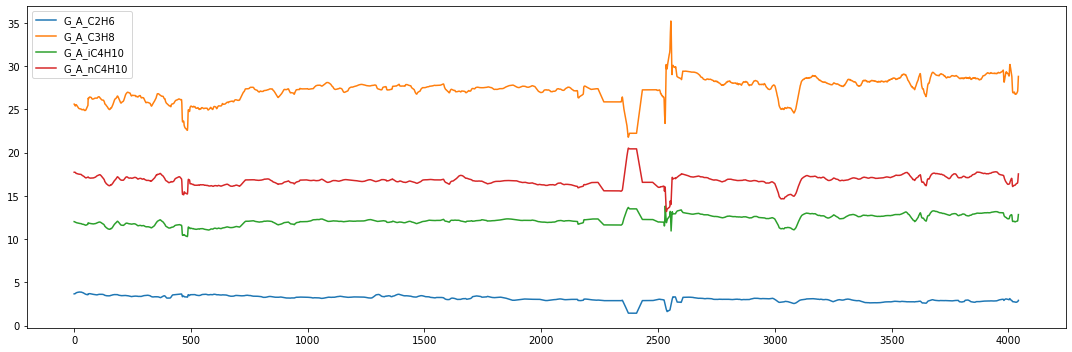

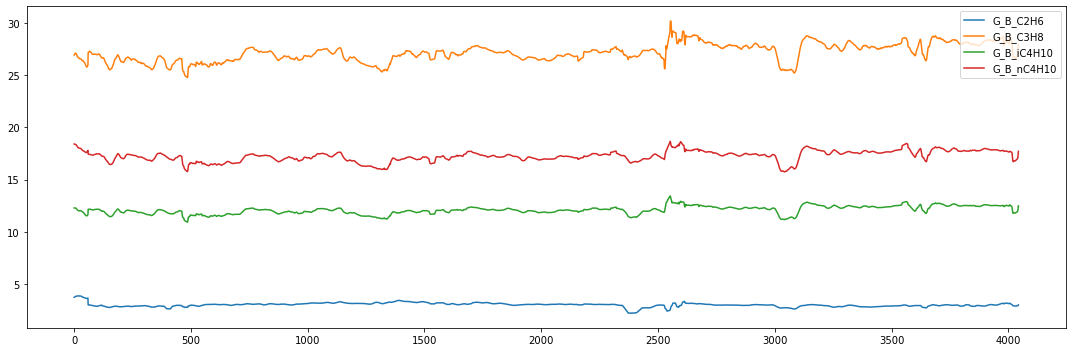

In [856]:
plt.rcParams["figure.figsize"] = (15,5)

test_data[['G_A_C2H6', 'G_A_C3H8','G_A_iC4H10', 'G_A_nC4H10']][:].plot()

# make room for tick labels
plt.tight_layout()

plt.rcParams["figure.figsize"] = (15,5)

test_data[['G_B_C2H6', 'G_B_C3H8','G_B_iC4H10', 'G_B_nC4H10']][:].plot()

# make room for tick labels
plt.tight_layout()


plt.show()

In [857]:
predict = pd.DataFrame()

In [858]:
predict[['timestamp']] = test_data[['timestamp']]

In [859]:
B = pd.DataFrame({'B_C2H6':[],'B_C3H8':[],'B_iC4H10':[], 'B_nC4H10':[]})

In [860]:
for i in range(test_data.shape[0]):
    new_line = {}
    B_C2H6 = test_data.loc[i,'G_B_C2H6'] * 100 / test_data.loc[i,'B_rate']
    B_C3H8 = test_data.loc[i,'G_B_C3H8'] * 100 / test_data.loc[i,'B_rate']
    B_iC4H10 = test_data.loc[i,'G_B_iC4H10'] * 100 / test_data.loc[i,'B_rate']
    B_nC4H10 = test_data.loc[i,'G_B_nC4H10'] * 100 / test_data.loc[i,'B_rate']
    
    new_line.update({'B_C2H6':B_C2H6,'B_C3H8':B_C3H8,'B_iC4H10':B_iC4H10,'B_nC4H10': B_nC4H10})
    B = B.append(new_line, ignore_index=True)

In [861]:
predict = pd.concat([predict,B] , axis=1)

In [862]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-04-29 18:00:00,4.977989,35.993070,16.417060,24.605813
1,2020-04-29 18:30:00,4.999293,36.060937,16.415238,24.586777
2,2020-04-29 19:00:00,5.020295,36.098497,16.412917,24.573314
3,2020-04-29 19:30:00,5.044432,36.144059,16.418947,24.571099
4,2020-04-29 20:00:00,5.072765,36.233689,16.442558,24.594553
...,...,...,...,...,...
4039,2020-07-22 21:30:00,4.109167,37.786203,16.784302,23.894264
4040,2020-07-22 22:00:00,4.095998,37.841694,16.817753,23.927690
4041,2020-07-22 22:30:00,4.088471,37.946301,16.878035,23.972464
4042,2020-07-22 23:00:00,4.082446,37.989134,16.923896,24.000384


In [863]:
for i in range(0,60):
    predict.drop(i, axis=0, inplace=True)

In [864]:
predict = predict.reset_index(drop=True)

In [865]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.040656,36.591168,16.379915,23.504051
1,2020-05-01 00:30:00,4.036043,36.627066,16.385951,23.510742
2,2020-05-01 01:00:00,4.032905,36.705241,16.414455,23.535286
3,2020-05-01 01:30:00,4.035703,36.797851,16.439184,23.550142
4,2020-05-01 02:00:00,4.035373,36.882098,16.461051,23.565931
...,...,...,...,...,...
3979,2020-07-22 21:30:00,4.109167,37.786203,16.784302,23.894264
3980,2020-07-22 22:00:00,4.095998,37.841694,16.817753,23.927690
3981,2020-07-22 22:30:00,4.088471,37.946301,16.878035,23.972464
3982,2020-07-22 23:00:00,4.082446,37.989134,16.923896,24.000384


In [866]:
predict.to_csv('predictSGD_-60.csv', sep=',', header=True, index=False)

In [867]:
a = pd.read_csv('sample_submission.csv', header = 0, sep = ',')
b = pd.read_csv('predictSGD_-60.csv', header = 0, sep = ',')

In [868]:
a

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.363701,37.742757,16.843028,24.171264
1,2020-05-01 00:30:00,4.363701,37.742757,16.843028,24.171264
2,2020-05-01 01:00:00,4.363701,37.742757,16.843028,24.171264
3,2020-05-01 01:30:00,4.363701,37.742757,16.843028,24.171264
4,2020-05-01 02:00:00,4.363701,37.742757,16.843028,24.171264
...,...,...,...,...,...
3979,2020-07-22 21:30:00,4.363701,37.742757,16.843028,24.171264
3980,2020-07-22 22:00:00,4.363701,37.742757,16.843028,24.171264
3981,2020-07-22 22:30:00,4.363701,37.742757,16.843028,24.171264
3982,2020-07-22 23:00:00,4.363701,37.742757,16.843028,24.171264


In [869]:
b

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.040656,36.591168,16.379915,23.504051
1,2020-05-01 00:30:00,4.036043,36.627066,16.385951,23.510742
2,2020-05-01 01:00:00,4.032905,36.705241,16.414455,23.535286
3,2020-05-01 01:30:00,4.035703,36.797851,16.439184,23.550142
4,2020-05-01 02:00:00,4.035373,36.882098,16.461051,23.565931
...,...,...,...,...,...
3979,2020-07-22 21:30:00,4.109167,37.786203,16.784302,23.894264
3980,2020-07-22 22:00:00,4.095998,37.841694,16.817753,23.927690
3981,2020-07-22 22:30:00,4.088471,37.946301,16.878035,23.972464
3982,2020-07-22 23:00:00,4.082446,37.989134,16.923896,24.000384


In [870]:
#test_data.to_excel('123.xlsx')